In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2S
from tensorflow.keras.applications.efficientnet_v2  import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from glob import glob
import os
import cv2


In [ ]:
!git clone https://github.com/JebetC/Hamoye_capstone_project_smote.git

Cloning into 'Hamoye_capstone_project_smote'...
remote: Enumerating objects: 10791, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 10791 (delta 3), reused 22 (delta 3), pack-reused 10768
Receiving objects: 100% (10791/10791), 359.96 MiB | 32.49 MiB/s, done.
Resolving deltas: 100% (8/8), done.
Checking out files: 100% (10809/10809), done.


In [ ]:
# loading the data
train_path = "Hamoye_capstone_project_smote/Data/train/"
val_path = "Hamoye_capstone_project_smote/Data/val"
test_path = "Hamoye_capstone_project_smote/Data/test"

In [ ]:
train_outs = os.listdir(train_path)
test_outs = os.listdir(test_path)
val_outs = os.listdir(val_path)

In [ ]:
class_labels = []
for item in train_outs:
   labels_all = os.listdir(train_path + "/" + item) 
   print(labels_all)
   for i in labels_all:
    class_labels.append((item, str("train_outs" + "/" + item) +  i))
    #print(class_labels[:5])


['Zebra_340.jpg', 'Zebra_ref_gen_0_5195.jpg', 'Zebra_728.jpg', 'Zebra_ref_gen_0_3567.jpg', 'Zebra_299.jpg', 'Zebra_ref_gen_0_3831.jpg', 'Zebra_ref_gen_0_184.jpg', 'Zebra_ref_gen_0_7020.jpg', 'Zebra_ref_gen_0_1444.jpg', 'Zebra_508.jpg', 'Zebra_ref_gen_0_1017.jpg', 'Zebra_ref_gen_0_2324.jpg', 'Zebra_452.jpg', 'Zebra_ref_gen_0_2995.jpg', 'Zebra_ref_gen_0_6540.jpg', 'Zebra_ref_gen_0_1107.jpg', 'Zebra_ref_gen_0_1854.jpg', 'Zebra_55.jpg', 'Zebra_ref_gen_0_4289.jpg', 'Zebra_ref_gen_0_706.jpg', 'Zebra_ref_gen_0_6141.jpg', 'Zebra_ref_gen_0_5277.jpg', 'Zebra_867.jpg', 'Zebra_ref_gen_0_6592.jpg', 'Zebra_ref_gen_0_2336.jpg', 'Zebra_936.jpg', 'Zebra_ref_gen_0_5530.jpg', 'Zebra_483.jpg', 'Zebra_ref_gen_0_1608.jpg', 'Zebra_ref_gen_0_7398.jpg', 'Zebra_789.jpg', 'Zebra_884.jpg', 'Zebra_ref_gen_0_2726.jpg', 'Zebra_ref_gen_0_355.jpg', 'Zebra_ref_gen_0_2302.jpg', 'Zebra_536.jpg', 'Zebra_756.jpg', 'Zebra_ref_gen_0_7687.jpg', 'Zebra_676.jpg', 'Zebra_ref_gen_0_1506.jpg', 'Zebra_839.jpg', 'Zebra_69.jpg', 'Zeb

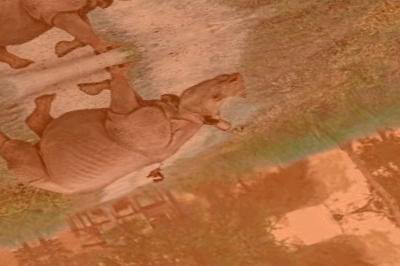

In [ ]:
rhino_img = image.load_img(train_path + "/" + "Rhino" + "/" + "Rhino_ref_gen_0_2066.jpg")
rhino_img

In [ ]:
image_size = [384,384]
effnet = EfficientNetV2S(input_shape=image_size+ [3], weights='imagenet', include_top=False)

82436096/82420632 [==============================] - 1s 0us/step


In [ ]:
# Freezing layers
for layer in effnet.layers:
    layer.trainable = False

In [ ]:
file_ = glob(train_path + "/*")
file_

['Hamoye_capstone_project_smote/Data/train/Zebra',
 'Hamoye_capstone_project_smote/Data/train/Elephant',
 'Hamoye_capstone_project_smote/Data/train/Rhino',
 'Hamoye_capstone_project_smote/Data/train/Buffalo']

In [ ]:
x = Flatten()(effnet.output)

In [ ]:
prediction_layer = Dense(len(file_), activation='softmax')(x)
model = Model(inputs=effnet.input, outputs=prediction_layer)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 384, 384, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 384, 384, 3)  0           ['input_1[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 192, 192, 24  648         ['rescaling[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
im_size = 384
batchsize = 32

In [ ]:
train_gen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.15,
                                   horizontal_flip = True)

val_gen = ImageDataGenerator(rescale = 1./255)

test_gen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_generator = train_gen.flow_from_directory(train_path,
                                                 target_size = (im_size, im_size),
                                                 batch_size = batchsize,
                                                 seed=42,
                                                 shuffle=True,
                                                 class_mode = 'categorical')

Found 7556 images belonging to 4 classes.


In [ ]:
val_generator = val_gen.flow_from_directory(val_path,
                                             target_size = (im_size,im_size),
                                             batch_size = batchsize,
                                             class_mode ="categorical")

Found 2160 images belonging to 4 classes.


In [ ]:
test_generator = test_gen.flow_from_directory(test_path,
                                             target_size = (im_size,im_size),
                                             batch_size = batchsize,
                                             class_mode ="categorical")

Found 1084 images belonging to 4 classes.


In [ ]:
hist =model.fit_generator(
    training_generator, validation_data = val_generator, epochs =20
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
237/237 [==============================] - 349s 1s/step - loss: 5.2393 - accuracy: 0.7071 - val_loss: 5.0288 - val_accuracy: 0.7194
Epoch 2/20
237/237 [==============================] - 346s 1s/step - loss: 5.9598 - accuracy: 0.7053 - val_loss: 4.9755 - val_accuracy: 0.7278
Epoch 3/20
237/237 [==============================] - 349s 1s/step - loss: 5.1640 - accuracy: 0.7112 - val_loss: 7.5828 - val_accuracy: 0.6574
Epoch 4/20
237/237 [==============================] - 347s 1s/step - loss: 4.6898 - accuracy: 0.7246 - val_loss: 4.8392 - val_accuracy: 0.7435
Epoch 5/20
237/237 [==============================] - 343s 1s/step - loss: 4.1870 - accuracy: 0.7384 - val_loss: 4.3244 - val_accuracy: 0.7426
Epoch 6/20
237/237 [==============================] - 337s 1s/step - loss: 4.2084 - accuracy: 0.7382 - val_loss: 4.5240 - val_accuracy: 0.7315
Epoch 7/20
237/237 [==============================] - 335s 1s/step - loss: 4.9112 - accuracy: 0.7276 - val_loss: 5.3634 - val_accuracy: 0.7231

In [ ]:
import matplotlib.pyplot as plt

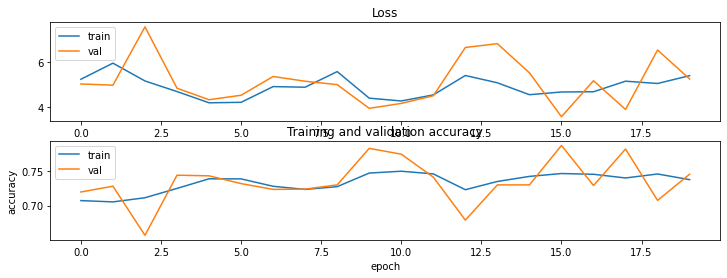

The model needs more fine-tuning to improve it. The model has the desired output to the 5 th epoch.


In [ ]:
plt.figure(figsize = [12,4])
plt.subplot(211)
plt.title('Loss')
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.legend()

plt.subplot(212)
plt.plot(hist.history["accuracy"], label = "train")
plt.plot(hist.history["val_accuracy"], label = "val")
plt.title("Training and validation accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()

print("The model needs more fine-tuning to improve it. The model has the desired output to the 5 th epoch.")

In [44]:
model.save_weights("efficientnetv2s.h5")

In [ ]:
preds = model.evaluate(test_generator)
print(preds)

34/34 [==============================] - 24s 685ms/step - loss: 5.4851 - accuracy: 0.7177
[5.485090732574463, 0.7177121639251709]


In [45]:
prediction = model.predict(test_generator)
print(prediction)

[[8.6509650e-19 5.4528601e-15 1.0000000e+00 1.7714217e-20]
 [2.1797853e-11 1.5490658e-16 1.0000000e+00 6.9742183e-27]
 [5.7800090e-34 5.5919896e-05 6.0354867e-11 9.9994409e-01]
 ...
 [1.8211840e-16 5.4851178e-21 1.0000000e+00 0.0000000e+00]
 [2.8711967e-03 7.8739207e-18 9.9712878e-01 1.4568508e-11]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00]]


In [67]:
prediction.argmin(axis = 1)

array([3, 3, 0, ..., 3, 1, 0])

In [54]:
path = test_path
im_test = []
lab_test = []

for i in test_outs:
    path_test = path + "/" + str(i)
    filenames = [i for i in os.listdir(path_test)]
    
    for f in filenames:
        img = cv2.imread(path_test + "/" + f)
        img = cv2.resize(img, (im_size,im_size))
        im_test.append(img)
        lab_test.append(i)

In [59]:
labels_test = []

for item in test_outs:
    all_labels = os.listdir(test_path + "/" + item)
    print(all_labels)

    for room in all_labels:
       labels_test.append((item, str(test_path + "/" + item) + "/" + room))
       print(labels_test[:5])

['Zebra_877.jpg', 'Zebra_36.jpg', 'Zebra_376.jpg', 'Zebra_ref_gen_0_5834.jpg', 'Zebra_700.jpg', 'Zebra_ref_gen_0_1590.jpg', 'Zebra_ref_gen_0_1513.jpg', 'Zebra_ref_gen_0_1369.jpg', 'Zebra_ref_gen_0_831.jpg', 'Zebra_311.jpg', 'Zebra_ref_gen_0_4700.jpg', 'Zebra_ref_gen_0_1907.jpg', 'Zebra_ref_gen_0_3180.jpg', 'Zebra_ref_gen_0_4644.jpg', 'Zebra_976.jpg', 'Zebra_ref_gen_0_4891.jpg', 'Zebra_419.jpg', 'Zebra_ref_gen_0_2082.jpg', 'Zebra_216.jpg', 'Zebra_ref_gen_0_595.jpg', 'Zebra_889.jpg', 'Zebra_689.jpg', 'Zebra_ref_gen_0_488.jpg', 'Zebra_ref_gen_0_659.jpg', 'Zebra_433.jpg', 'Zebra_947.jpg', 'Zebra_ref_gen_0_708.jpg', 'Zebra_ref_gen_0_260.jpg', 'Zebra_ref_gen_0_3331.jpg', 'Zebra_ref_gen_0_6803.jpg', 'Zebra_334.jpg', 'Zebra_807.jpg', 'Zebra_ref_gen_0_3703.jpg', 'Zebra_ref_gen_0_2235.jpg', 'Zebra_ref_gen_0_7007.jpg', 'Zebra_729.jpg', 'Zebra_943.jpg', 'Zebra_314.jpg', 'Zebra_ref_gen_0_7014.jpg', 'Zebra_520.jpg', 'Zebra_ref_gen_0_2223.jpg', 'Zebra_ref_gen_0_1073.jpg', 'Zebra_ref_gen_0_7591.jpg', 

In [62]:
import pandas as pd
df_test = pd.DataFrame(data = labels_test, columns=["labels_test","image_test"])
df_test.head()

,labels_test,image_test
0,Zebra,Hamoye_capstone_project_smote/Data/test/Zebra/...
1,Zebra,Hamoye_capstone_project_smote/Data/test/Zebra/...
2,Zebra,Hamoye_capstone_project_smote/Data/test/Zebra/...
3,Zebra,Hamoye_capstone_project_smote/Data/test/Zebra/...
4,Zebra,Hamoye_capstone_project_smote/Data/test/Zebra/...


In [72]:
y_test = df_test["labels_test"].values
y_test


array(['Zebra', 'Zebra', 'Zebra', ..., 'Buffalo', 'Buffalo', 'Buffalo'],
      dtype=object)

In [74]:
from sklearn.preprocessing import LabelEncoder
y_encoded = LabelEncoder()
y_test = y_encoded.fit_transform(y_test)

In [80]:
from sklearn.metrics import f1_score, confusion_matrix

f1_out = f1_score(y_test,prediction.argmax(axis = 1), average = "macro")

0.25287013984714357

In [81]:
#confusion_matrix(y_test, prediction.argmax(axis = 1))

In [82]:
import pickle
pickle.dump(model,open("EfficientNetV2S.pkl", "wb"))

INFO:tensorflow:Assets written to: ram://45734740-6c15-4d75-a90f-320ba20b82e9/assets
